In [2]:
# Libraries for file and directory operations
import os
import shutil
import glob
import random

# avoid warnings
import warnings 
warnings. filterwarnings('ignore')

# Library for data processing
import numpy as np
import math
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

# Libraries for deep learning model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers.normalization.batch_normalization import BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# dataset path
dataset_path = 'C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType'

# Define training and test folders
training_folder_path = "C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\Training"
test_folder_path = "C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\Test"

In [4]:
# Counting total labels
def count_labels(folder_path):
    label_count = 0
    for _, dirs, _ in os.walk(folder_path):
        label_count += len(dirs)
        break  # Only count the top-level directories and exit the loop
    return label_count

num_labels = count_labels(training_folder_path)
print(f"Number of labels (folders) in the training dataset: {num_labels}")

Number of labels (folders) in the training dataset: 2


In [5]:
# Get a list of all labels (subfolder names) within the training folder
labels = [label for label in os.listdir(training_folder_path) if os.path.isdir(os.path.join(training_folder_path, label))]

# Sort the labels alphabetically
sorted_labels = sorted(labels)

# Print the list of labels
print("Sorted Labels:")
for label in sorted_labels:
    print(label)

Sorted Labels:
apple_pink_lady_1
apple_red_delicios_1


In [6]:
# creating a folder for filtered dataset in the working directory

def create_folders(destination_path):
    # Create "filtered_dataset" folder directly
    os.makedirs(destination_path, exist_ok=True)

    # Create "training" and "test" folders within "filtered_dataset"
    training_path = os.path.join(destination_path, "training")
    test_path = os.path.join(destination_path, "test")
    os.makedirs(training_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

if __name__ == "__main__":
    destination_path = "C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\filtered_dataset"
    create_folders(destination_path)

    print(f"filtered_dataset folder created successfully in {destination_path}")
    print(f"Training folder created successfully in {destination_path}.")
    print(f"Test folder created successfully in {destination_path}.")

filtered_dataset folder created successfully in C:\Users\surya\IOT Project\Apple Classification\AppleType\filtered_dataset
Training folder created successfully in C:\Users\surya\IOT Project\Apple Classification\AppleType\filtered_dataset.
Test folder created successfully in C:\Users\surya\IOT Project\Apple Classification\AppleType\filtered_dataset.


In [7]:
def copy_selected_folders(source_path, destination_path, selected_fruits):
    if not os.path.exists(source_path):
        print("Source path does not exist.")
        return

    source_folders = os.listdir(source_path)
    for fruit_pattern in selected_fruits:
        fruit_pattern = fruit_pattern.lower()  # Make sure the fruit pattern is in lowercase
        fruit_folder_matches = [f for f in source_folders if f.lower().startswith(fruit_pattern)]

        if not fruit_folder_matches:
            print(f"No variants found for '{fruit_pattern}'.")
            continue

        for source_folder in fruit_folder_matches:
            fruit_name = source_folder
            source_folder = os.path.join(source_path, source_folder)
            destination_folder = os.path.join(destination_path, fruit_name)
            try:
                shutil.copytree(source_folder, destination_folder)
                print(f"Fruit '{fruit_name}' copied successfully in {destination_path}.")
            except FileExistsError:
                print(f"Fruit '{fruit_name}' already exists in the destination path.")
                
# copy fruit folders to training folder
if __name__ == "__main__":
    source_path = "C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\Training"
    destination_path = "C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\filtered_dataset\\training"
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["Apple"] 
  
    copy_selected_folders(source_path, destination_path, selected_fruits)
    
# copy fruit folders to test folder
if __name__ == "__main__":
    source_path = "C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\Test"
    destination_path = "C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\filtered_dataset\\test"
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["Apple"] 
  
    copy_selected_folders(source_path, destination_path, selected_fruits)

Fruit 'apple_pink_lady_1' already exists in the destination path.
Fruit 'apple_red_delicios_1' already exists in the destination path.
Fruit 'apple_pink_lady_1' already exists in the destination path.
Fruit 'apple_red_delicios_1' already exists in the destination path.


In [8]:
training_subset="C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\filtered_dataset\\training"
test_subset="C:\\Users\\surya\\IOT Project\\Apple Classification\\AppleType\\filtered_dataset\\test"

# function to count images in each folder
def count_images_per_label(folder_path):
    label_counts = {
        label: len(os.listdir(os.path.join(folder_path, label)))
        for label in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, label))
    }

    return label_counts

if __name__ == "__main__":
    # Count images in training folders
    training_label_counts = count_images_per_label(training_subset)
    test_label_counts = count_images_per_label(test_subset)
    sorted_training_label_counts = sorted(training_label_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_test_label_counts = sorted(test_label_counts.items(), key=lambda x: x[1], reverse=True)
print("Training Label Counts (sorted by count):")
for label, count in sorted_training_label_counts:
    print(f"{label}: {count}")
print("Test Label Counts (sorted by count):")
for label, count in sorted_test_label_counts:
    print(f"{label}: {count}")

Training Label Counts (sorted by count):
apple_pink_lady_1: 313
apple_red_delicios_1: 300
Test Label Counts (sorted by count):
apple_pink_lady_1: 156
apple_red_delicios_1: 150


In [9]:
#counting number of images
def count_total_images(folder_path):
    total_images = 0
    for _, _, files in os.walk(folder_path):
        total_images += len(files)
    return total_images

total_images_count = count_total_images(dataset_path)
total_train_images_count = count_total_images(training_subset)
total_test_images_count = count_total_images(test_subset)

#Display total number of images in each folder of the dataset
print(f"Total number of images in the main dataset: {total_images_count}")
print(f"Total number of images in the training dataset: {total_train_images_count}")
print(f"Total number of images in the test dataset: {total_test_images_count}")

Total number of images in the main dataset: 2144
Total number of images in the training dataset: 613
Total number of images in the test dataset: 306


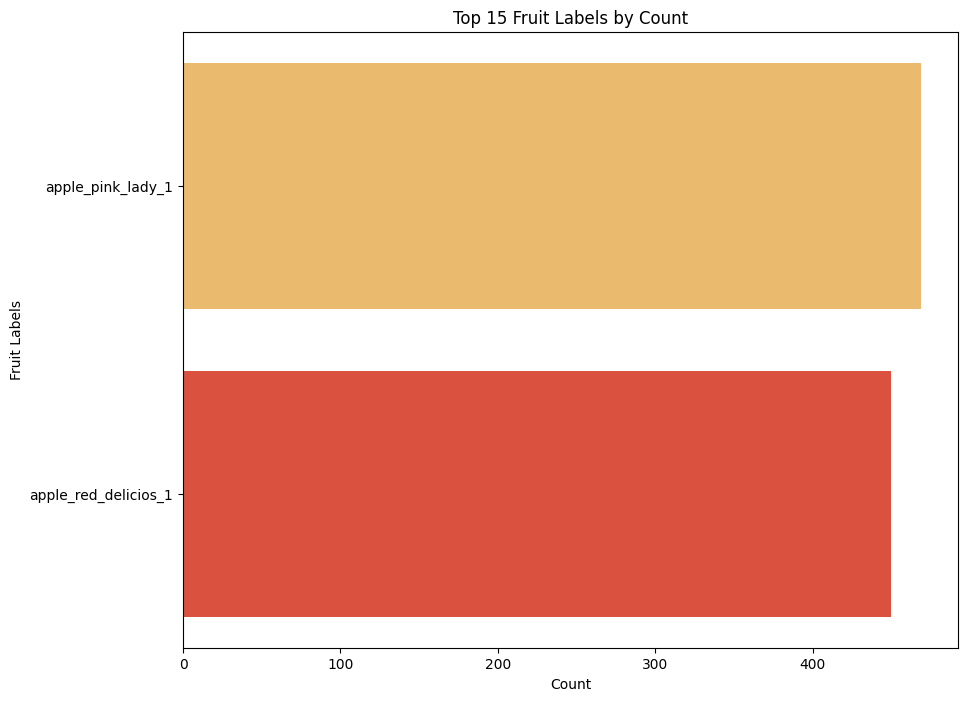

In [10]:
# Combine the training and test label counts into a single dictionary
combined_label_counts = {
    label: training_label_counts.get(label, 0) + test_label_counts.get(label, 0)
    for label in set(list(training_label_counts.keys()) + list(test_label_counts.keys()))
}

# Create a DataFrame to hold the combined fruit counts
df_fruit_counts = pd.DataFrame({"Fruit Labels": list(combined_label_counts.keys()), "Count": list(combined_label_counts.values())})

# Sort the DataFrame by the counts in descending order
df_fruit_counts = df_fruit_counts.sort_values(by="Count", ascending=False)

# Select the top 15 fruit labels by count
top_15_fruits = df_fruit_counts.head(15)

# Plot the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Fruit Labels", data=top_15_fruits, palette="YlOrRd")
plt.xlabel("Count")
plt.ylabel("Fruit Labels")
plt.title("Top 15 Fruit Labels by Count")
plt.show()

In [11]:
BATCH_SIZE = 32
IMAGE_SIZE = 200
CHANNELS = 3
EPOCHS = 4

In [12]:
# training dataset pipeline
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 613 files belonging to 2 classes.


In [13]:
#print training labels
tr_class_names = train_dataset.class_names
tr_class_names

['apple_pink_lady_1', 'apple_red_delicios_1']

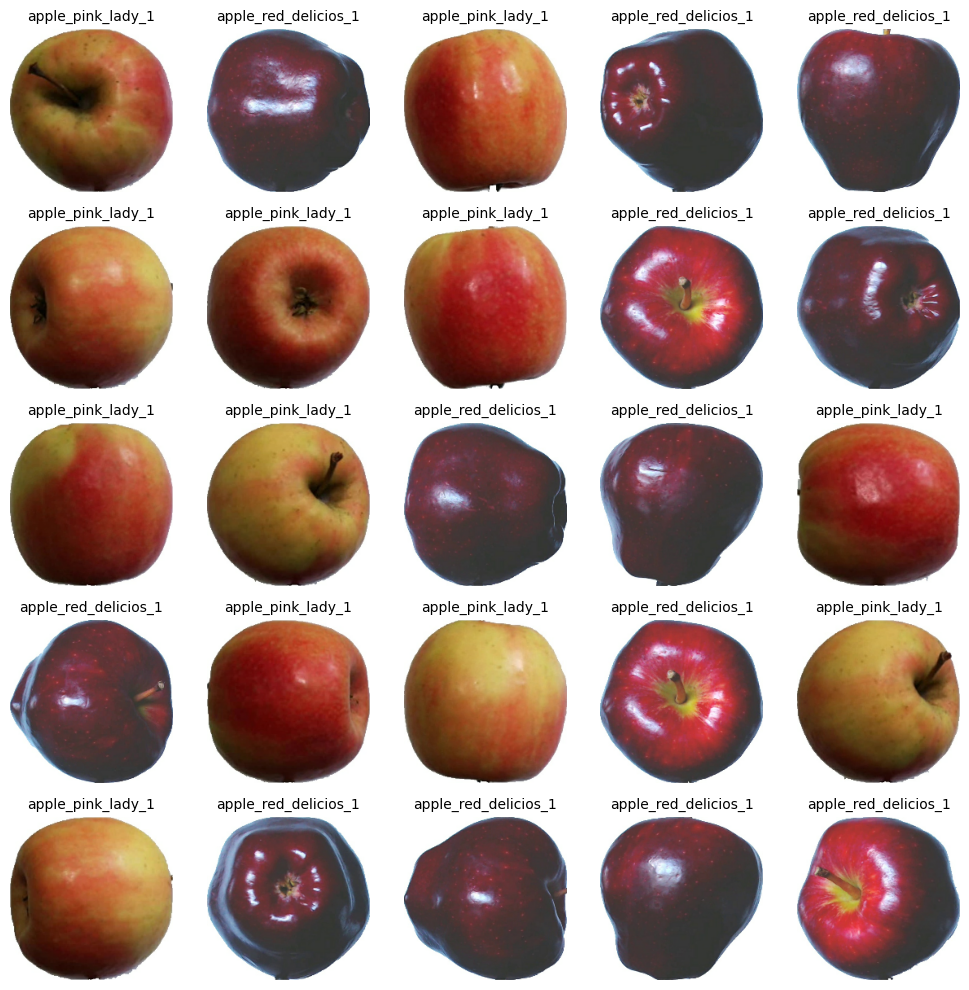

In [14]:
#visualizing sample images from the dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(9):
    for i in range(25):
        ax = plt.subplot(5,5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(tr_class_names[labels_batch[i]], fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [15]:
# define a function to split the dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1234)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)

    return train_ds, val_ds

In [16]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [17]:
#print length of each set
print("Training dataset length",len(train_ds))
print("Validation dataset length",len(val_ds))

Training dataset length 16
Validation dataset length 4


In [18]:
# Optimization for Training and Validation Datasets by caching and shuffling
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
# resize and rescaling images to a specified size 
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [20]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
# Defining the shape of the input data batch for CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Number of outputs
n_classes = len(tr_class_names)
n_classes

2

In [22]:
# CNN model
model = Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [23]:
# Review the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 200, 200, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 198, 198, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 99, 99, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 97, 97, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 48, 48, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 46, 46, 64)         

In [24]:
# specifying the optimizer and model metrics
model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [25]:
# saving the model training history
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/4
16/16 [==============================] - 17s 859ms/step - loss: 0.6610 - accuracy: 0.7266 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 2/4
16/16 [==============================] - 12s 729ms/step - loss: 0.4844 - accuracy: 0.9434 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 3/4
16/16 [==============================] - 12s 757ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 7.8152e-05 - val_accuracy: 1.0000
Epoch 4/4
16/16 [==============================] - 12s 731ms/step - loss: 5.7049e-05 - accuracy: 1.0000 - val_loss: 1.2220e-05 - val_accuracy: 1.0000


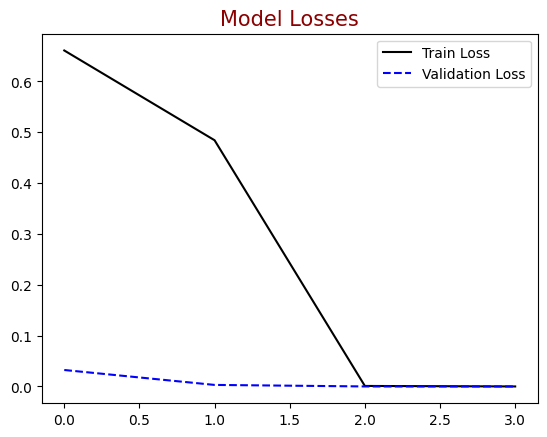

In [26]:
#Plotting train & validation loss
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "blue", linestyle="dashed")
plt.title("Model Losses", color = "darkred", size = 15)
plt.legend()
plt.show()

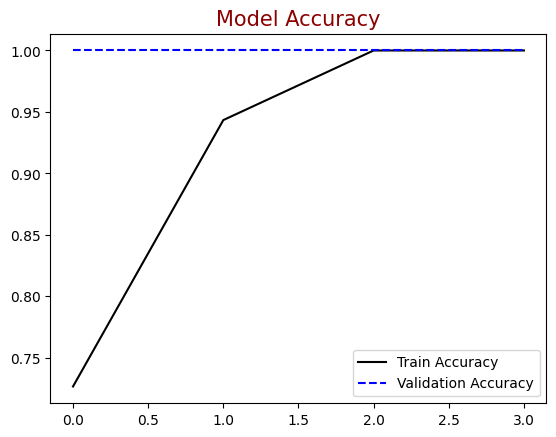

In [27]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(history .history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history .history["val_accuracy"],label = "Validation Accuracy", color = "blue", linestyle="dashed")
plt.title("Model Accuracy", color = "darkred", size = 15)
plt.legend()
plt.show()

In [28]:
# test dataset pipeline
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   test_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 306 files belonging to 2 classes.


In [29]:
#print training labels
ts_class_names = test_dataset.class_names
ts_class_names

['apple_pink_lady_1', 'apple_red_delicios_1']

first image to predict
actual label: apple_pink_lady_1
1/1 [==============================] - 0s 247ms/step
predicted label: apple_pink_lady_1


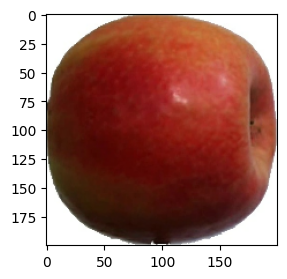

In [30]:
# Fetching model predictions for sample image in test dataset
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",ts_class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",tr_class_names[np.argmax(batch_prediction[0])])

In [31]:
# Defining prediction function for testing images
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = ts_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


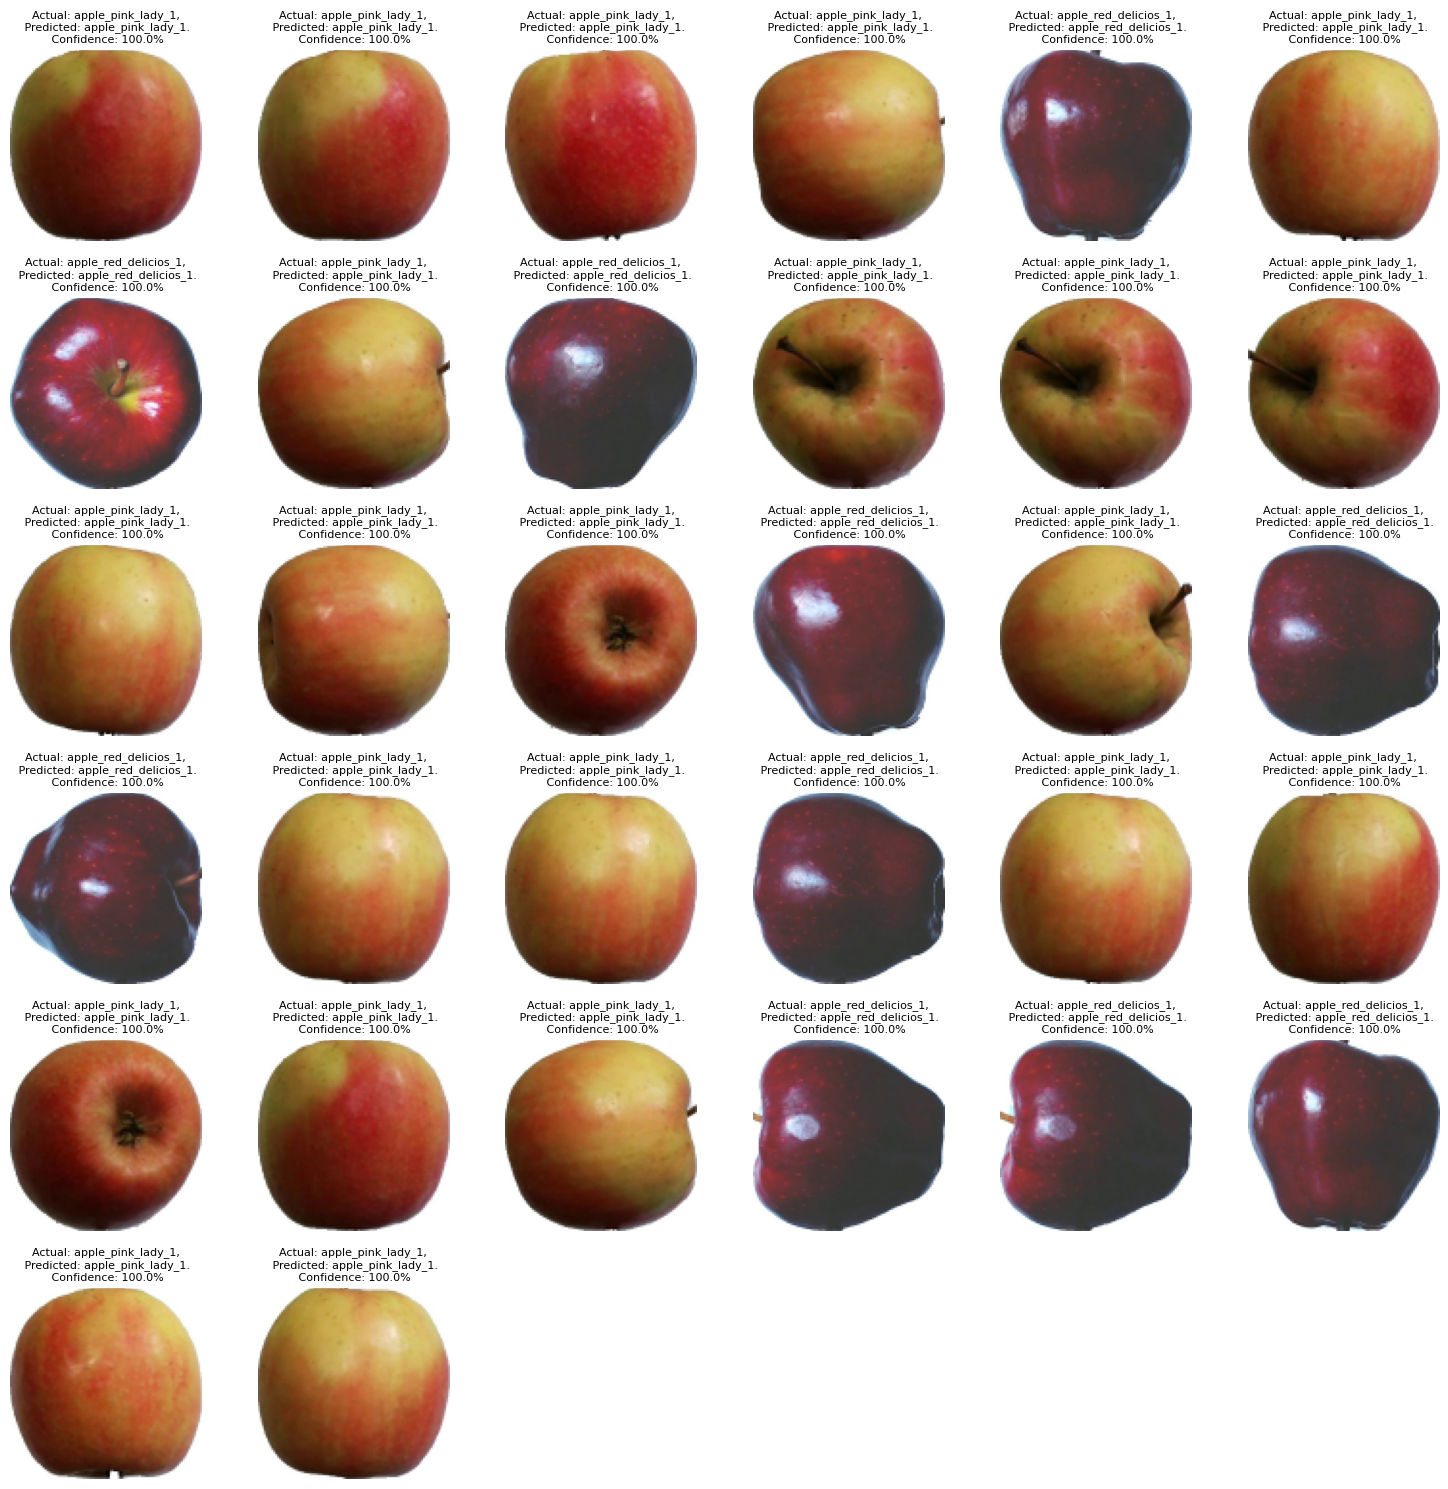

In [32]:
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
batch_size = 32
for images, labels in test_dataset.take(12):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= batch_size - 1:
        break

# Hide any empty subplots
for i in range(i + 1, batch_size):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 16ms/step


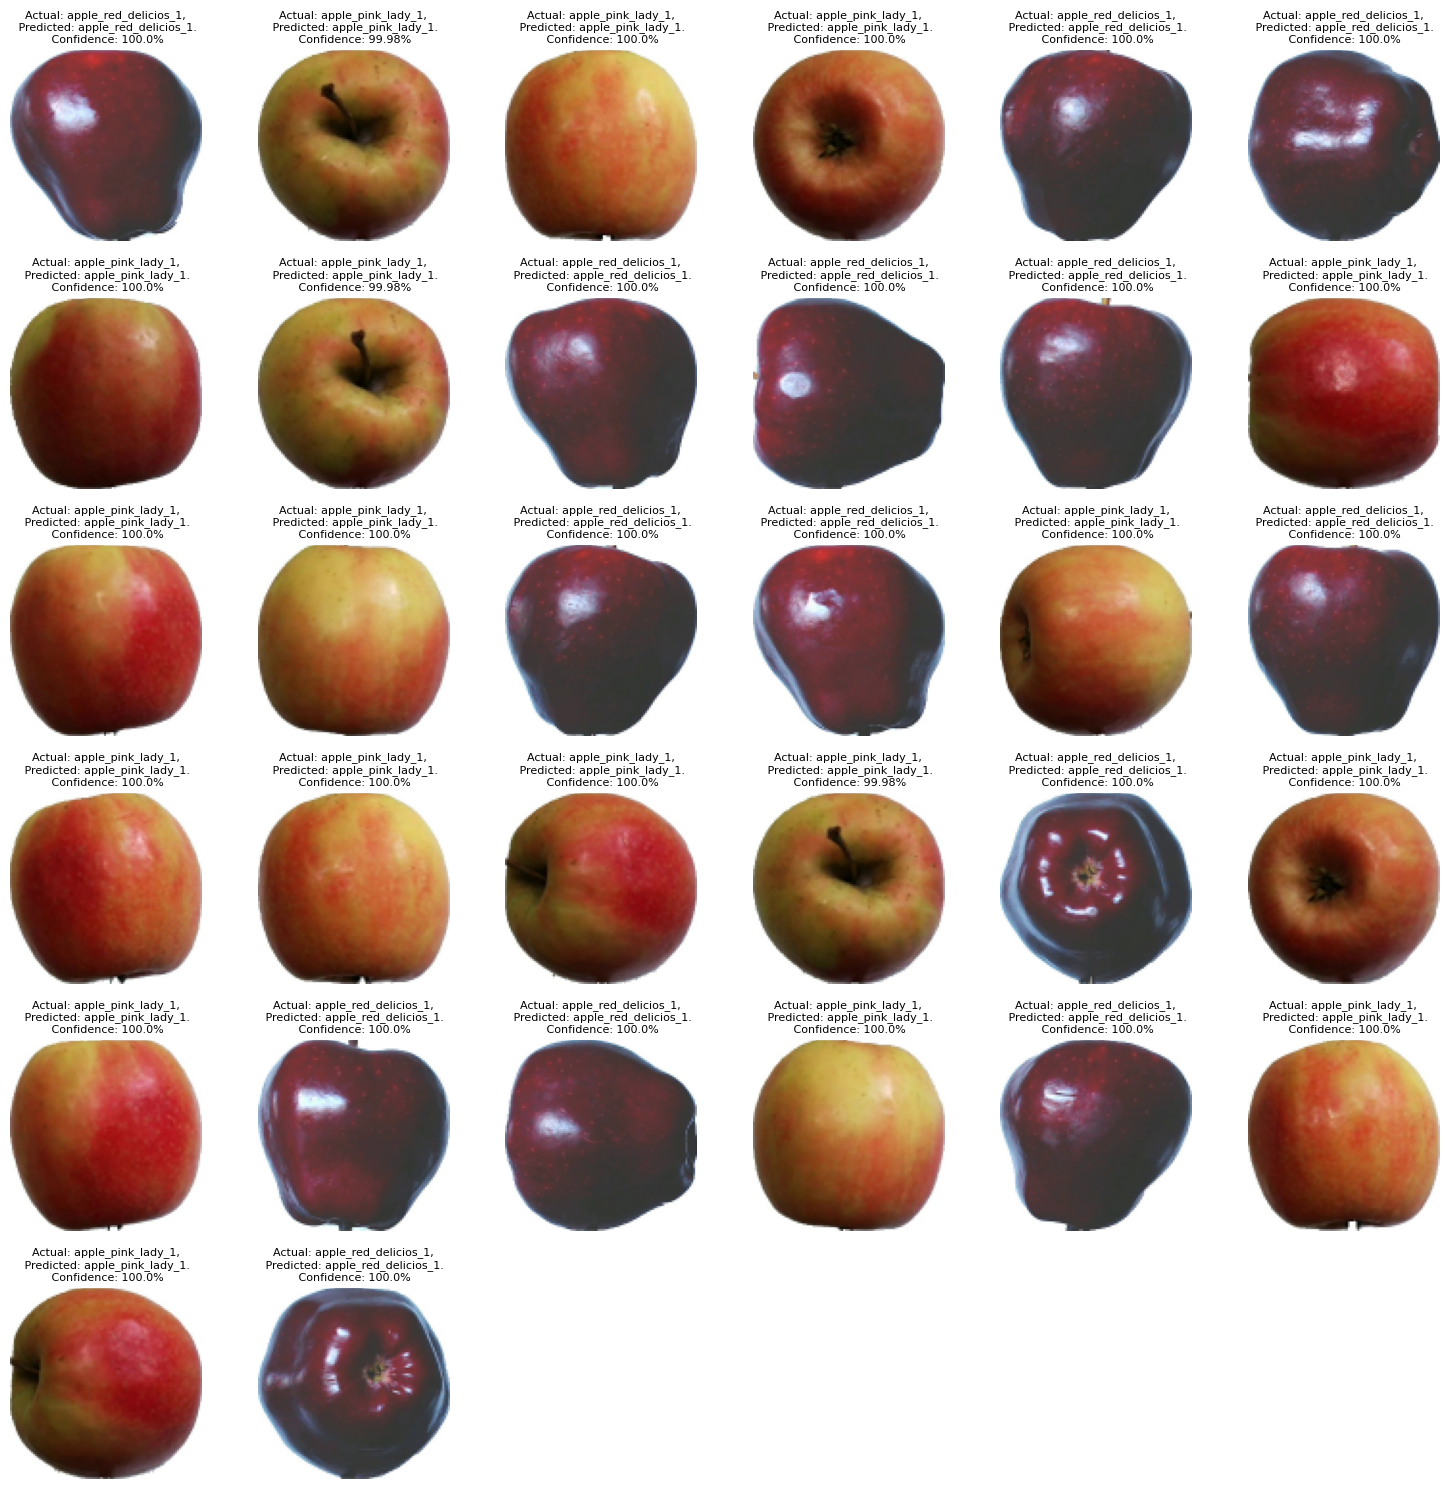

In [33]:
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
batch_size = 32
for images, labels in test_dataset.take(15):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= batch_size - 1:
        break

# Hide any empty subplots
for i in range(i + 1, batch_size):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [34]:
from PIL import Image
 
# Opens a image in RGB mode
im = Image.open(r"C:\\Users\\surya\\IOT Project\\Apple Classification\\predictImage\\images\\t.jpg")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = width/3
top = height/4
right = width - left
bottom = height - top
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
im1.save("C:\\Users\\surya\\IOT Project\\Apple Classification\\predictImage\\finalimages_pl\\predict1\\t1.jpg")


Found 1 files belonging to 1 classes.
first image to predict
1/1 [==============================] - 0s 81ms/step
predicted label: apple_pink_lady_1


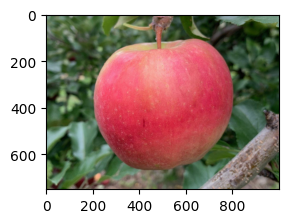

In [39]:
# test dataset pipeline
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "C:\\Users\\surya\\IOT Project\\Apple Classification\\predictImage\\finalimages_pl",
    seed=47,
    shuffle=True,
    image_size=(100,100),
    batch_size=BATCH_SIZE
)

# Fetching model predictions for sample image in test dataset
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_dataset.take(2):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(im)
 

    batch_prediction = model.predict(images_batch)
    print("predicted label:",tr_class_names[np.argmax(batch_prediction[0])])

Found 1 files belonging to 1 classes.
first image to predict
1/1 [==============================] - 0s 47ms/step
predicted label: apple_red_delicios_1


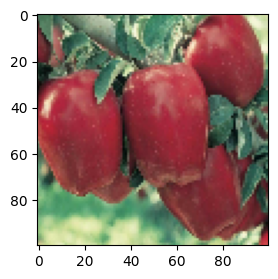

In [40]:
# test dataset pipeline
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "C:\\Users\\surya\\IOT Project\\Apple Classification\\predictImage\\finalimages_rd",
    seed=47,
    shuffle=True,
    image_size=(100,100),
    batch_size=BATCH_SIZE
)

# Fetching model predictions for sample image in test dataset
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
 

    batch_prediction = model.predict(images_batch)
    print("predicted label:",tr_class_names[np.argmax(batch_prediction[0])])